##                         Predicting Employee Attrition

## Project Aim:
The goal of this project is to build a machine learning model that can predict whether an employee is likely to leave a company (attrition) based on various work-related features such as age, job role, salary, experience, distance from home, and more.
This prediction can help Human Resource (HR) departments take preventive measures to retain valuable employees, reduce hiring costs, and improve workforce stability.

## Step 1: Importing Required Libraries

In this step, we import all the necessary Python libraries required for data loading, analysis, visualization, machine learning model building, and evaluation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

## Step 2: Load the Dataset

In [2]:
df=pd.read_csv(r"C:\Users\syedz\Downloads\Employee attrition(Zubair).csv") 

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Step 3: Dataset Overview and Basic Information

We explore the basic structure, size, and statistical properties of the dataset.

In [4]:
print("Shape of dataset:", df.shape)

Shape of dataset: (1470, 35)


In [5]:
print("\nData types:\n", df.dtypes)


Data types:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalW

In [6]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole    

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


##  Step 4: Exploratory Data Analysis (EDA) 

visualizing important patterns in the data such as attrition count, distribution by gender, department, and other features.

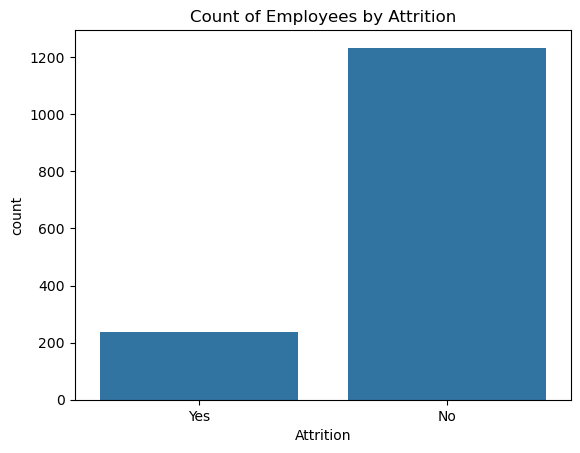

In [8]:
# Attrition Count
sns.countplot(x="Attrition", data=df)
plt.title("Count of Employees by Attrition")
plt.show()

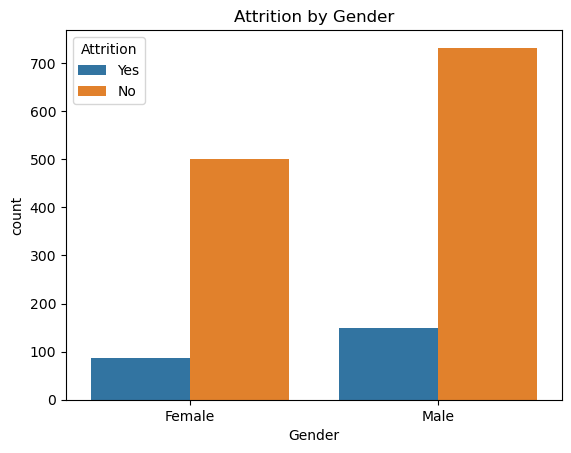

In [9]:
# Attrition by Gender
sns.countplot(x="Gender", hue="Attrition", data=df)
plt.title("Attrition by Gender")
plt.show()

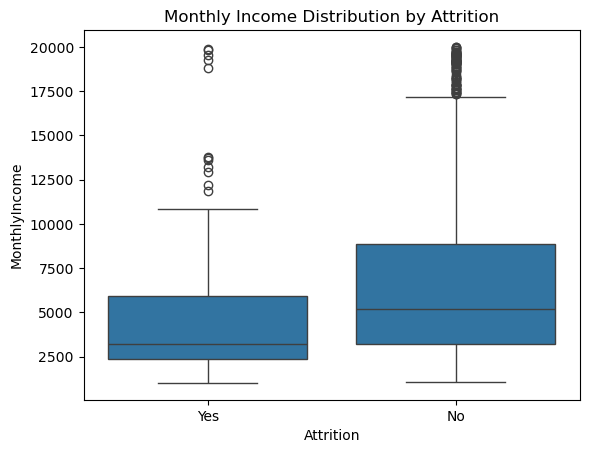

In [10]:
# Monthly Income Distribution by Attrition
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.title("Monthly Income Distribution by Attrition")
plt.show()

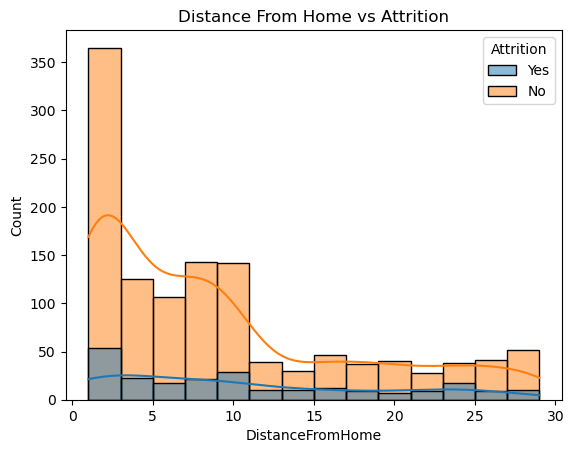

In [11]:
# Distance From Home Distribution
sns.histplot(data=df, x="DistanceFromHome", hue="Attrition", kde=True)
plt.title("Distance From Home vs Attrition")
plt.show()

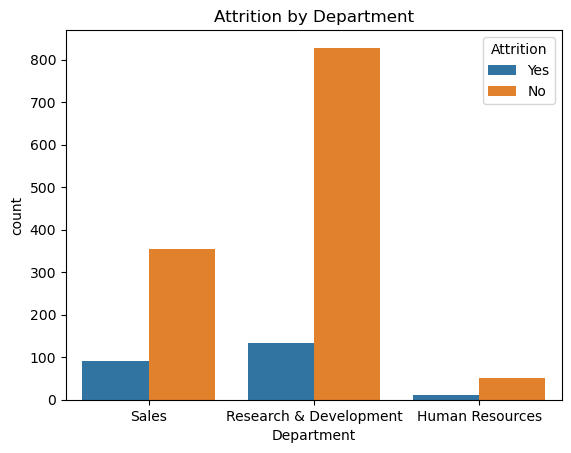

In [12]:
# Attrition by Department
sns.countplot(x="Department", hue="Attrition", data=df)
plt.title("Attrition by Department")
plt.show()

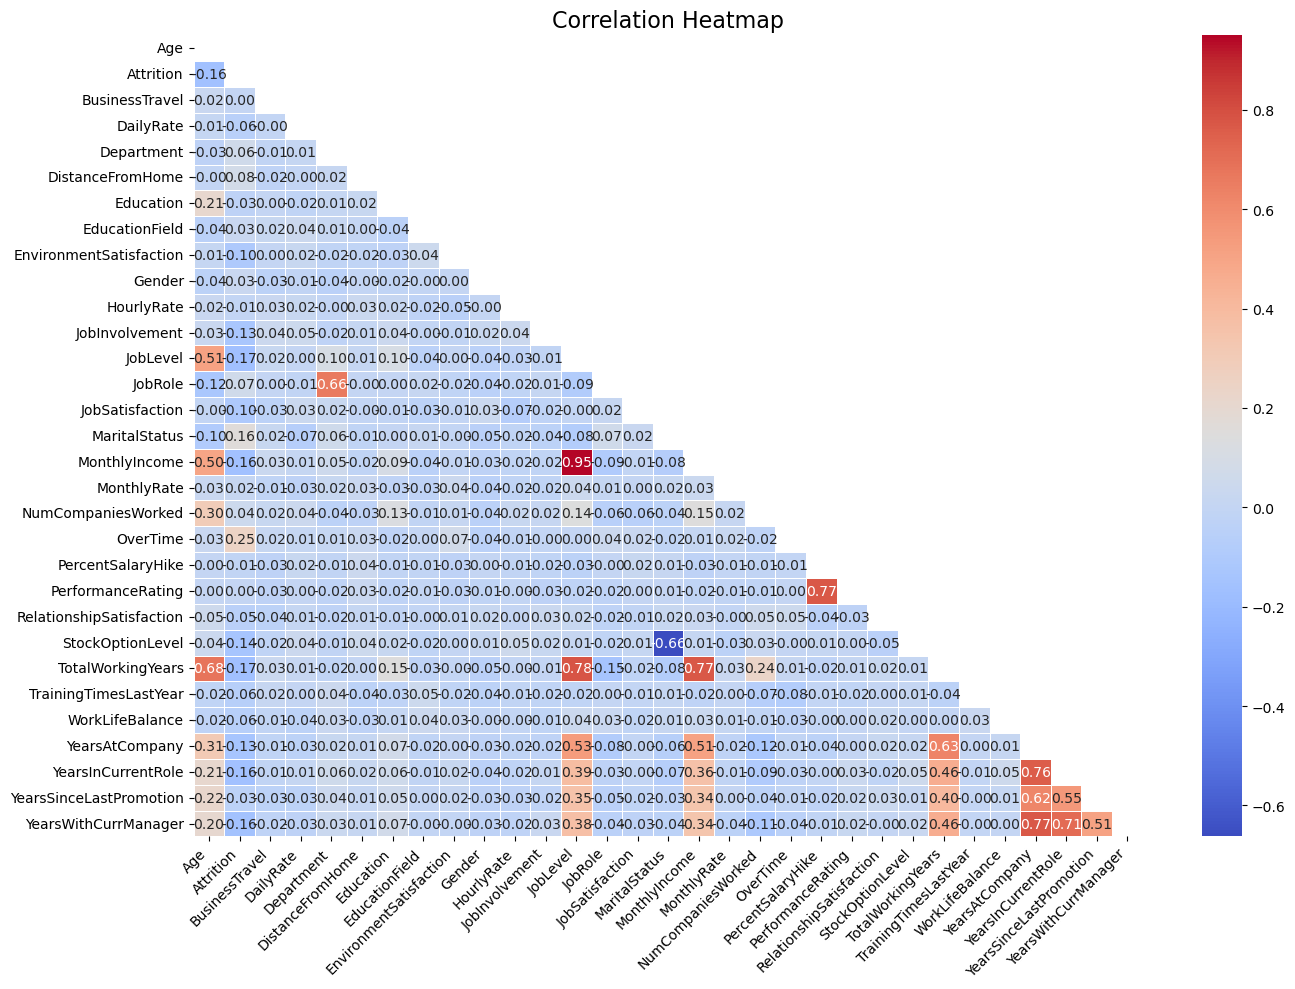

In [35]:
plt.figure(figsize=(14,10))
corr_matrix = df.corr()

# Mask upper triangle to reduce redundancy
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Step 5: Data Cleaning and Label Encoding

We remove columns that are not useful for prediction and convert categorical columns into numerical format using Label Encoding.

In [30]:
# Droping non-informative columns 
cols_to_drop = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)
# Initialize label encoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

## Step 6:Handling Class Imbalance with SMOTE

To address the imbalance in the target variable (`Attrition`), we applied the Synthetic Minority Oversampling Technique (SMOTE). This method generates synthetic samples for the minority class, helping the model learn from both classes more effectively

In [31]:
# Split features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']
# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

## Step 7:Feature Scaling and Train-Test Split

After balancing the dataset using SMOTE, feature scaling is performed using `StandardScaler` to normalize all features. This ensures that each feature contributes equally to the model's performance.

In [32]:
# Apply SMOTE first
sm = SMOTE(random_state=42)
X_res_scaled = scaler.fit_transform(X_res)
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res_scaled, y_res, test_size=0.2, random_state=42)

## Step 8:Model Training with XGBoost

We used the `XGBoost` classifier, a powerful gradient boosting algorithm, for predicting employee attrition.

In [33]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## Step 9:Model Evaluation

After training the XGBoost model, we evaluated its performance on the test set using the following metrics:

In [34]:
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9291497975708503
Confusion Matrix:
 [[230  20]
 [ 15 229]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       250
           1       0.92      0.94      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



## Step 10:Feature Importance Analysis

To understand which features contribute most to the attrition prediction, we extracted and visualized feature importances from the trained model.

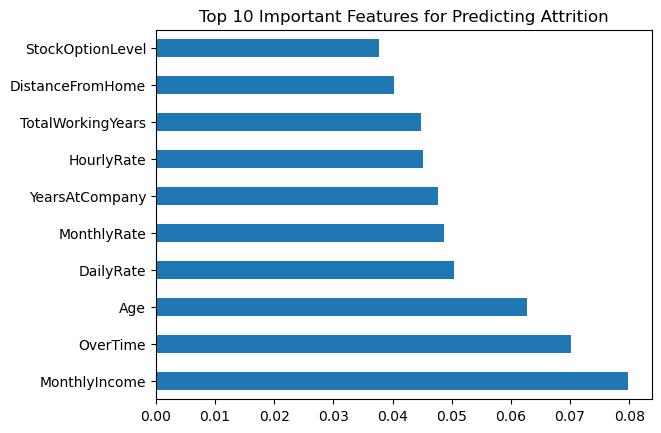

In [121]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features for Predicting Attrition")
plt.show()

##  Step 11:Attrition Risk Level Categorization

After predicting the probability of attrition for each employee, we categorized the results into three risk levels:

   Actual  Predicted_Prob Risk_Level
0       0            0.20        Low
1       0            0.07        Low
2       1            0.39        Low
3       0            0.04        Low
4       0            0.06        Low


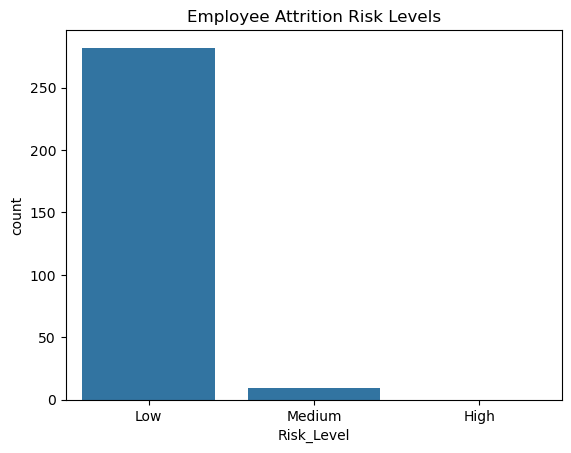

In [62]:
probs = model.predict_proba(X_test)[:, 1]

risk_level = pd.cut(probs, bins=[0, 0.4, 0.7, 1.0], labels=["Low", "Medium", "High"])
risk_df = pd.DataFrame({'Actual': y_test.values, 'Predicted_Prob': probs, 'Risk_Level': risk_level})
print(risk_df.head())

# Visualizing risk levels
sns.countplot(x="Risk_Level", data=risk_df)
plt.title("Employee Attrition Risk Levels")
plt.show()

## Step 12:Testing Prediction on Unseen Employee

We tested how well our trained model can predict attrition for a new, unseen employee.

In [38]:
# Picking an existing row as a base
emp = X.iloc[0].copy()
# Changing some values to simulate a new employee
emp['Age'] = 30
emp['MonthlyIncome'] = 6000
emp['DistanceFromHome'] = 8
emp['OverTime'] = 1
emp['JobRole'] = 2
# Converting to DataFrame
emp_df = pd.DataFrame([emp])
# Scaling the input using the same scaler
emp_scaled = scaler.transform(emp_df)
# Making prediction
pred = xgb_model.predict(emp_scaled)
prob = xgb_model.predict_proba(emp_scaled)[0][1]
# Showing result
print("Prediction (0=Stay, 1=Leave):", pred[0])
print("Attrition Probability:", round(prob * 100, 2), "%")


Prediction (0=Stay, 1=Leave): 1
Attrition Probability: 86.1 %


## Step 13(Final Step): Conclusion and Key Insights
## Key Insights
- The model successfully provided a binary prediction and a probability score for an unseen case.
- This process demonstrates how the trained model can assist HR in making informed, data-driven decisions for employee retention.
- High attrition probabilities can trigger early intervention and personalized engagement strategies.
- The workflow is reusable for batch predictions or integration into an HR dashboard.

## Conclusion

In this project, we built an employee attrition prediction model using the XGBoost algorithm. By addressing class imbalance with SMOTE and applying feature scaling, the model achieved high accuracy and reliable performance. The process demonstrated the ability to identify at-risk employees and predict attrition probability, making it a valuable tool for HR decision-making.
